# Import libraries

In [1]:
# Disable warning
#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.listdir("./Datasets/MNIST/digit-recognizer"))

['sample_submission.csv', 'test.csv', 'train.csv']


FAST_RUN=False
batch_size=32
epochs=3
if FAST_RUN:
    epochs=1

# Import data
Data input train and test data

In [2]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48
dataset = "FER"
data = pd.read_csv("./Datasets/FER-2013/fer2013.csv")
#data.rename(columns={"emotion": "label"}, inplace=True)

In [3]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
#dataset = "MNIST"

if dataset == "MNIST":
    train_data = pd.read_csv("./Datasets/MNIST/digit-recognizer/train.csv")
    test_data = pd.read_csv("./Datasets/MNIST/digit-recognizer/test.csv")

# Data exploration

**Columns**

In [5]:
print(data.columns)

Index(['emotion', 'pixels', 'Usage'], dtype='object')


We can see that data have label and other pixels columns. Which label present the digit and pixel present pixel of image

**Show Image**
This is how 784 pixels of each row form to be images

In [6]:
width, height = 48, 48

datapoints = data['pixels'].tolist()

#getting features for training
X = []
for xseq in datapoints:
    xx = [int(xp) for xp in xseq.split(' ')]
    xx = np.asarray(xx).reshape(width, height)
    X.append(xx.astype('float32'))

X = np.asarray(X)
X = np.expand_dims(X, -1)

#getting labels for training
y = pd.get_dummies(data['emotion']).as_matrix()

#storing them using numpy
np.save('fdataX', X)
np.save('flabels', y)

print("Preprocessing Done")
print("Number of Features: "+str(len(X[0])))
print("Number of Labels: "+ str(len(y[0])))
print("Number of examples in dataset:"+str(len(X)))
print("X,y stored in fdataX.npy and flabels.npy respectively")

E:\Anaconda3\envs\python36gpu\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
Preprocessing Done
Number of Features: 48
Number of Labels: 7
Number of examples in dataset:35887
X,y stored in fdataX.npy and flabels.npy respectively


In [7]:
#temp_data = np.load("fdatax.npy")
#print(len(temp_data[3]))
#print(temp_data.shape)

In [8]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#num_instances, num_features = temp_data.shape
#temp_data = np.reshape(temp_data, newshape=(-1, num_features))
#temp_data = scaler.fit_transform(temp_data)

In [9]:
if dataset == "MNIST":
    def show_image(train_image, label, index):
        image_shaped = train_image.values.reshape(28,28)
        plt.subplot(3, 6, index+1)
        plt.imshow(image_shaped, cmap=plt.cm.gray)
        plt.title(label)


    plt.figure(figsize=(18, 8))
    sample_image = train_data.sample(18).reset_index(drop=True)
    for index, row in sample_image.iterrows():
        label = row['label']
        image_pixels = row.drop('label')
        show_image(image_pixels, label, index)
    plt.tight_layout()

# Data Preparation
We split data for test and train

In [10]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

if dataset == "MNIST":
    x = train_data.drop(columns=['label']).values.reshape(train_data.shape[0],28,28,1)
    y = to_categorical(train_data['label'])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

elif dataset == "FER":
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


Using TensorFlow backend.


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_datagen.fit(x_train)
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen.fit(x_test)
validation_generator = validation_datagen.flow(
    x_test,
    y_test
    
)

# Build CNN Model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [13]:
if dataset == "MNIST":

    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(48,48,1)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(7, activation='softmax'))

# Compile Model

In [14]:
if dataset == "MNIST":
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks

In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

# Fit model

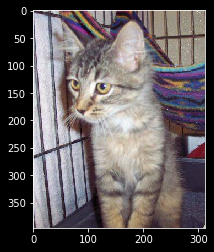

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an color image in grayscale
img = cv2.imread('cat.2.jpg',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# or for a specific key
#while(1):
#    cv2.imshow('image',img)
#    if cv2.waitKey(20) & 0xFF == 27:
#        break
#cv2.destroyAllWindows()

#Import image
# OpenCV uses BGR, Matplotlib uses RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [31]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [16]:


from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_labels, activation='softmax'))

#model.summary()

#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

#training the model
model.fit(np.array(x_train), np.array(y_train),
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_split=0.1,
          shuffle=True,
          callbacks=callbacks)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 29068 samples, validate on 3230 samples
Epoch 1/20
29068/29068 [==============================] - 23s 807us/step - loss: 1.8967 - accuracy: 0.2324 - val_loss: 1.8092 - val_accuracy: 0.2650

Epoch 00001: val_loss improved from inf to 1.80919, saving model to model.h5
Epoch 2/20
29068/29068 [==============================] - 31s 1ms/step - loss: 1.6785 - accuracy: 0.3227 - val_loss: 1.6502 - val_accuracy: 0.3517

Epoch 00002: val_loss improved from 1.80919 to 1.65017, saving model to model.h5
Epoch 3/20
29068/29068 [==============================] - 50s 2ms/step - loss: 1.4567 - accuracy: 0.4408 - val_loss: 1.5817 - val_accuracy: 0.3802

Epoch 00003: val_loss improved from 1.65017 to 1.58174, saving model to model.h5
Epoch 4/20
29068/29068 [==============================] - 50s 2ms/step - loss: 1.3284 - accuracy: 0.5003 - val_loss: 1.2361 - val_accuracy: 0.5396

Epoch 00004: val_loss improved from

In [17]:
if dataset == "MNIST":
    model.fit(
        x_train, y_train,
        batch_size=batch_size,
        #steps_per_epoch=len(x_train) // batch_size,
        validation_split = 0.1,
        epochs=10,
        callbacks=callbacks
    )

In [18]:
if dataset == "MNIST":
    model.fit_generator(
        train_generator, 
        steps_per_epoch=len(x_train) // batch_size, 
        validation_data=validation_generator,
        validation_steps=len(x_test) // batch_size,
        epochs=epochs,
        callbacks=callbacks
    )

# Evaluate Model

In [24]:
x_test_recaled = (x_test.astype("float32") / 255)
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

accuracy: 66.26%
loss: 113.83%


In [20]:
if dataset == "MNIST":
    x_test_recaled = (x_test.astype("float32") / 255)
    scores = model.evaluate(x_test_recaled, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

# Prediction

In [21]:
test_digit_data = test_data.values.reshape(test_data.shape[0],28,28,1).astype("float32") / 255
predictions = model.predict(test_digit_data)
results = np.argmax(predictions, axis = 1) 

NameError: name 'test_data' is not defined

### Set how is our prediction

In [0]:
plt.figure(figsize=(18, 8))
sample_test = test_data.head(18)
for index, image_pixels in sample_test.iterrows():
    label = results[index]
    show_image(image_pixels, label, index)
plt.tight_layout()

### Create submission file

In [0]:
submissions = pd.read_csv("../input/sample_submission.csv")
submissions['Label'] = results
submissions.to_csv('submission.csv', index = False)

Next step check [Dog And Cat Image Classification](https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification)